# ИДЗ. Groceries dataset. Ассоциативный анализ

Выполнили: 

Афанасьев Назар (0310)

Подопригора Иван (0306)

<hr/>

## Предобработка и анализ данных

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, fpmax
from collections import Counter
from mlxtend.frequent_patterns import association_rules

In [60]:
pd.set_option('display.max_colwidth', None)

In [61]:
all_data = pd.read_csv('Groceries_dataset.csv')
all_data.shape # Размерность датасета

(38765, 3)

Первые 10 записей:

In [62]:
all_data.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


Список и количество предметов:

In [63]:
all_data['itemDescription'].value_counts() # (учитывая 759 дупликатов по дате и покупателю)

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

In [64]:
all_data['Date'].value_counts()

Date
21-01-2015    96
21-07-2015    93
29-11-2015    92
08-08-2015    92
30-04-2015    91
              ..
29-06-2014    26
04-07-2014    24
16-03-2015    23
17-03-2015    23
01-09-2015    22
Name: count, Length: 728, dtype: int64

In [65]:
all_data['Member_number'].value_counts()

Member_number
3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: count, Length: 3898, dtype: int64

Объединение товаров по дате и покупателю:

In [66]:
df=all_data.groupby(['Member_number','Date'])['itemDescription'].apply(np.sum)
df

Member_number  Date      
1000           15-03-2015                          sausagewhole milksemi-finished breadyogurt
               24-06-2014                                         whole milkpastrysalty snack
               24-07-2015                                          canned beermisc. beverages
               25-11-2015                                             sausagehygiene articles
               27-05-2015                                              sodapickled vegetables
                                                           ...                               
4999           24-01-2015    tropical fruitberriesother vegetablesyogurtkitchen towelsnapkins
               26-12-2015                                                  bottled waterherbs
5000           09-03-2014                                         fruit/vegetable juiceonions
               10-02-2015                              sodaroot vegetablessemi-finished bread
               16-11-2014         

In [67]:
df.values

array(['sausagewhole milksemi-finished breadyogurt',
       'whole milkpastrysalty snack', 'canned beermisc. beverages', ...,
       'fruit/vegetable juiceonions',
       'sodaroot vegetablessemi-finished bread',
       'bottled beerother vegetables'], dtype=object)

Чистый список транзакций:

In [68]:
transactions = [a[1]['itemDescription'].tolist() for a in list(all_data.groupby(['Member_number','Date']))]
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

Преобразование в булеву матрицу:

In [69]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions = pd.DataFrame(te_ary, columns=te.columns_)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Сортированный список товаров:

In [70]:
pf = transactions.describe()
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
item

,Count,Item
164,2363,whole milk
102,1827,other vegetables
122,1646,rolls/buns
138,1453,soda
165,1285,yogurt
123,1041,root vegetables
156,1014,tropical fruit
12,908,bottled water
130,903,sausage
30,795,citrus fruit


## FPGrowth & Association Rules

In [71]:
freq_items = fpgrowth(transactions, min_support=0.001, use_colnames = True)
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items.head(10)

,support,itemsets,length
0,0.157923,(whole milk),1
1,0.085879,(yogurt),1
2,0.060349,(sausage),1
3,0.009490,(semi-finished bread),1
4,0.051728,(pastry),1
5,0.018780,(salty snack),1
6,0.046916,(canned beer),1
7,0.015772,(misc. beverages),1
8,0.013700,(hygiene articles),1
9,0.097106,(soda),1


In [72]:
freq_items.tail(10)

,support,itemsets,length
740,0.001136,"(yogurt, waffles)",2
741,0.001069,"(cat food, rolls/buns)",2
742,0.001002,"(cat food, tropical fruit)",2
743,0.001671,"(cat food, whole milk)",2
744,0.001671,"(chewing gum, whole milk)",2
745,0.001403,"(yogurt, chewing gum)",2
746,0.001069,"(other vegetables, chewing gum)",2
747,0.001002,"(chewing gum, soda)",2
748,0.001069,"(whole milk, pasta)",2
749,0.001002,"(seasonal products, rolls/buns)",2


In [73]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
print(len(rules))
rules.head(10)

1238


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
2,(yogurt),(soda),0.085879,0.097106,0.005814,0.067704,0.697219,-0.002525,0.968463,-0.322065
3,(soda),(yogurt),0.097106,0.085879,0.005814,0.059876,0.697219,-0.002525,0.972342,-0.324769
4,(yogurt),(other vegetables),0.085879,0.122101,0.008087,0.094163,0.771192,-0.002399,0.969158,-0.245037
5,(other vegetables),(yogurt),0.122101,0.085879,0.008087,0.066229,0.771192,-0.002399,0.978957,-0.252593
6,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
7,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562
8,"(yogurt, other vegetables)",(whole milk),0.008087,0.157923,0.001136,0.140496,0.889649,-0.000141,0.979724,-0.111151
9,"(yogurt, whole milk)",(other vegetables),0.011161,0.122101,0.001136,0.101796,0.833705,-0.000227,0.977394,-0.167857


In [74]:
def search(min_support, max_len, metric, min_threshold, sample, n_items):
    """
    Запускает модель поиска ассоциативных правил с заданными параметрами

    - min_support — Минимальный уровень поддержки
    - max_len — Макисмальный размер набора
    - metric — Метрика для поиска правил
    - min_threshold — Минимальный порог для метрики
    - sample — процент данных для выборки (0-1)
    - n_items — кол-во правил для вывода (0 для отключения)

    Выводит и возвращает информацию о сформированных правилах 
    """

    sample_data = transactions.sample(frac=sample)
    freq_items = fpgrowth(sample_data, min_support=min_support, use_colnames = True, max_len=max_len)
    freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
    rules = association_rules(freq_items, metric=metric, min_threshold=min_threshold)
    rules = rules.sort_values(by=metric, ascending=False)
    if(n_items > 0): print(rules[[metric, 'antecedents', 'consequents']][:n_items])
    return rules

## Анализ модели

**SUPPORT**

In [75]:
res_support = search(min_support=0.001, max_len=None, metric="support", min_threshold=0.001, sample=1, n_items=20)
print("total:", len(res_support))

      support         antecedents         consequents
592  0.014837  (other vegetables)        (whole milk)
593  0.014837        (whole milk)  (other vegetables)
207  0.013968        (rolls/buns)        (whole milk)
206  0.013968        (whole milk)        (rolls/buns)
361  0.011629        (whole milk)              (soda)
360  0.011629              (soda)        (whole milk)
166  0.011161            (yogurt)        (whole milk)
167  0.011161        (whole milk)            (yogurt)
208  0.010559  (other vegetables)        (rolls/buns)
209  0.010559        (rolls/buns)  (other vegetables)
363  0.009691              (soda)  (other vegetables)
362  0.009691  (other vegetables)              (soda)
106  0.008955        (whole milk)           (sausage)
107  0.008955           (sausage)        (whole milk)
603  0.008220        (whole milk)    (tropical fruit)
602  0.008220    (tropical fruit)        (whole milk)
358  0.008087              (soda)        (rolls/buns)
359  0.008087        (rolls/

**CONFIDENCE**

In [76]:
res_confidence = search(min_support=0.001, max_len=None, metric="confidence", min_threshold=0.001, sample=1, n_items=20)
print("total:", len(res_confidence))

      confidence                  antecedents   consequents
187     0.255814            (yogurt, sausage)  (whole milk)
199     0.212500        (sausage, rolls/buns)  (whole milk)
193     0.179775              (soda, sausage)  (whole milk)
1163    0.176056        (semi-finished bread)  (whole milk)
165     0.170940         (yogurt, rolls/buns)  (whole milk)
188     0.164179        (whole milk, sausage)      (yogurt)
1099    0.162791                  (detergent)  (whole milk)
1182    0.160156                        (ham)  (whole milk)
374     0.157817               (bottled beer)  (whole milk)
1068    0.156863                (frozen fish)  (whole milk)
1168    0.148837                      (candy)  (whole milk)
173     0.148394                    (sausage)  (whole milk)
73      0.145215                     (onions)  (whole milk)
1136    0.144737           (processed cheese)  (whole milk)
1140    0.144737           (processed cheese)  (rolls/buns)
1053    0.144330                 (newspa

**LIFT**

In [77]:
res_lift = search(min_support=0.001, max_len=None, metric="lift", min_threshold=0.001, sample=1, n_items=20)
print("total:", len(res_lift))

          lift            antecedents            consequents
618   2.182917   (yogurt, whole milk)              (sausage)
623   2.182917              (sausage)   (yogurt, whole milk)
620   1.911760  (whole milk, sausage)               (yogurt)
621   1.911760               (yogurt)  (whole milk, sausage)
647   1.653762  (specialty chocolate)         (citrus fruit)
646   1.653762         (citrus fruit)  (specialty chocolate)
619   1.619866      (yogurt, sausage)           (whole milk)
622   1.619866           (whole milk)      (yogurt, sausage)
1145  1.617141       (tropical fruit)                (flour)
1144  1.617141                (flour)       (tropical fruit)
198   1.536764            (beverages)              (sausage)
199   1.536764              (sausage)            (beverages)
611   1.523708              (sausage)     (soda, whole milk)
606   1.523708     (soda, whole milk)              (sausage)
1141  1.518529              (napkins)               (pastry)
1140  1.518529          

**LEVERAGE**

In [78]:
res_leverage = search(min_support=0.0001, max_len=None, metric="leverage", min_threshold=0.001, sample=1, n_items=20)
print("total:", len(res_leverage))

Empty DataFrame
Columns: [leverage, antecedents, consequents]
Index: []
total: 0


**CONVICTION**

In [79]:
res_conviction = search(min_support=0.001, max_len=None, metric="conviction", min_threshold=0.001, sample=1, n_items=20)
print("total:", len(res_conviction))

      conviction                  antecedents        consequents
719     1.131541            (yogurt, sausage)       (whole milk)
720     1.093681        (whole milk, sausage)           (yogurt)
718     1.082219         (yogurt, whole milk)          (sausage)
713     1.069304        (sausage, rolls/buns)       (whole milk)
512     1.046969                      (flour)   (tropical fruit)
1231    1.046704                (soft cheese)           (yogurt)
1109    1.043555                  (detergent)           (yogurt)
264     1.040610           (processed cheese)       (rolls/buns)
260     1.039891           (processed cheese)  (root vegetables)
1195    1.038081        (specialty chocolate)     (citrus fruit)
332     1.036967  (packaged fruit/vegetables)       (rolls/buns)
926     1.036698          (seasonal products)       (rolls/buns)
494     1.035704                  (beverages)          (sausage)
1223    1.034855                (chewing gum)           (yogurt)
724     1.034806         

In [80]:
def compare(metric1, metric2, p_size=10):
    """
    Выводит граф для сравнения метрик

    metric1 — первая метрика
    metric2 — вторая метрика
    p_size — размер точки
    """

    rules = search(min_support=0.001, max_len=None, metric="support", min_threshold=0.0001, sample=1, n_items=0)
    plt.scatter(rules[metric1], rules[metric2], s=p_size)
    plt.title(f"{metric1} VS {metric2}")
    plt.xlabel(metric1)
    plt.ylabel(metric2)
    plt.show()

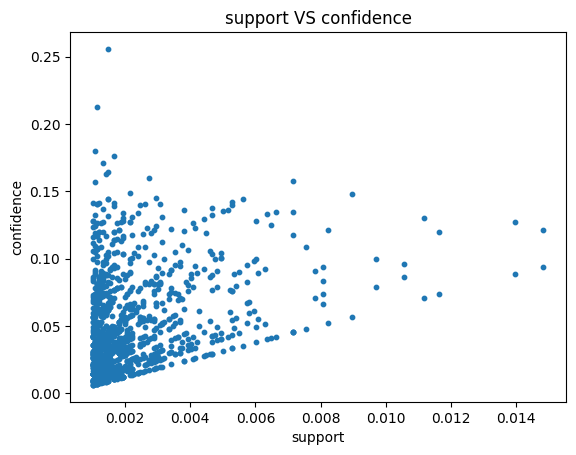

In [81]:
compare("support", "confidence")

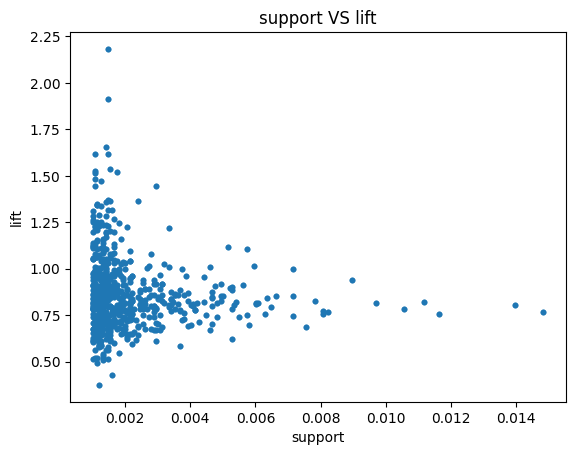

In [82]:
compare("support", "lift")

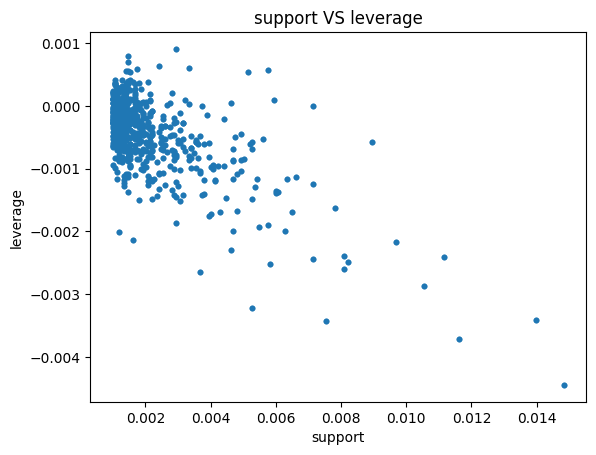

In [83]:
compare("support", "leverage")

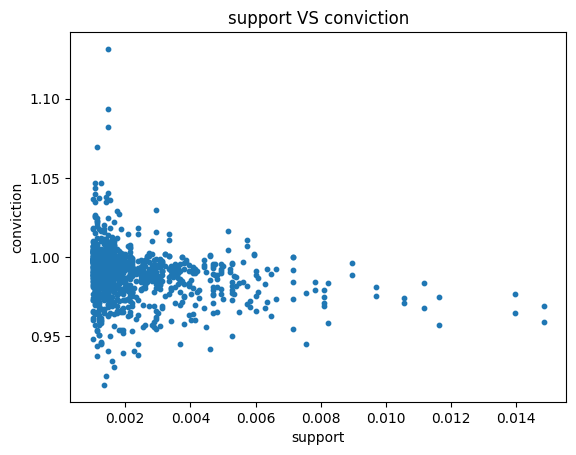

In [84]:
compare("support", "conviction")

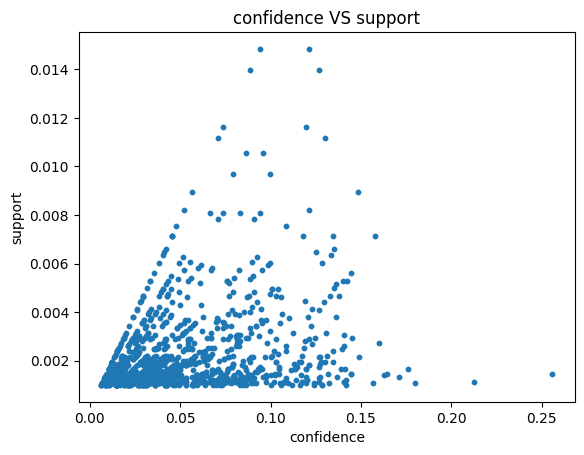

In [85]:
compare("confidence", "support")

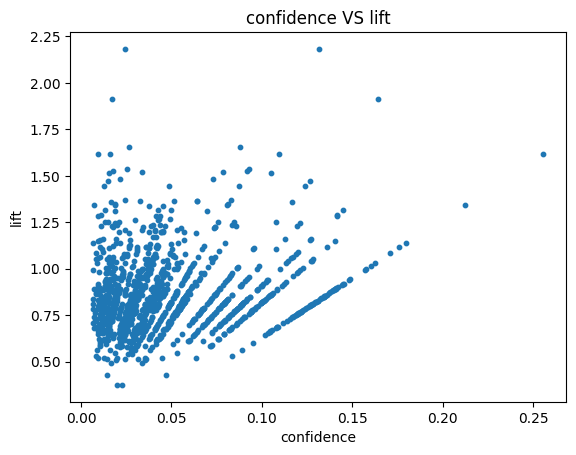

In [86]:
compare("confidence", "lift")

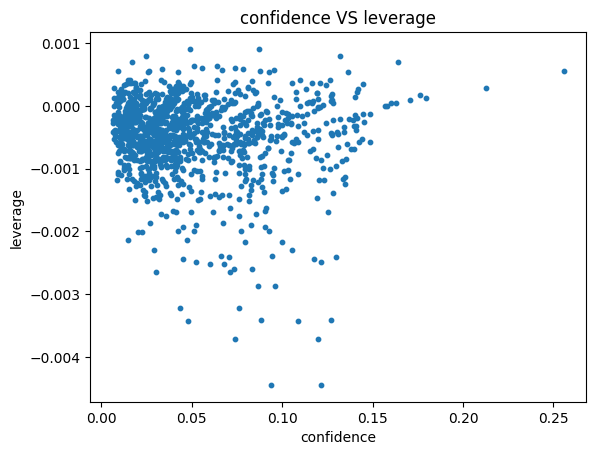

In [87]:
compare("confidence", "leverage")

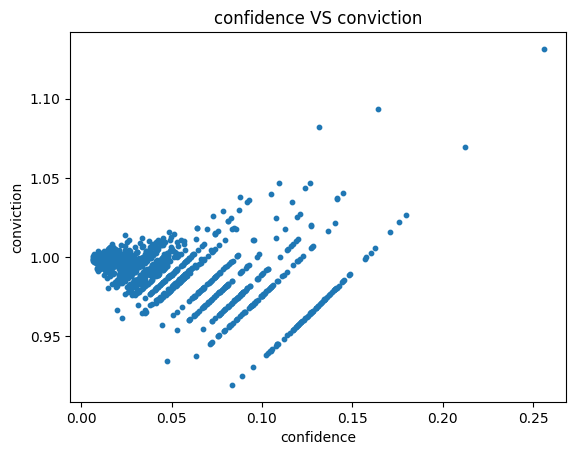

In [88]:
compare("confidence", "conviction")